In [1]:
import rebound
import reboundx
import numpy as np
import scipy
from scipy import signal

from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline

In [2]:
rhill = 0.3543

def add_moons(sim, num):
    randis = np.random.uniform(0,1000,size=num)
    a_rand = 4 * np.power(10, -2+randis/1000) * rhill
    """e_rand = np.random.randint(2,10,size=num)
    e_rand = 1/e_rand
    print(a_rand)
    w_rand = np.random.randint(0,360,size=num)*radeg
    half = int(num/2)
    i_rand1 = np.random.randint(0,30,size=half+1)*radeg
    i_rand2 = np.random.randint(150,180,size=half)*radeg
    i_rand = np.concatenate((i_rand1,i_rand2))
    node_rand = np.random.randint(0,360,size=num)*radeg"""
        
    for i in range(num):
        sem = a_rand[i]
        """ecc = e_rand[i]
        icl = i_rand[i]
        Ome = w_rand[i]
        nod = node_rand[i]"""
        has = 'Hill {0}'.format(i)
        sim.add(m=0, primary=sim.particles['jupiter'], a=sem, e=0, inc=0, Omega=0, omega=0, hash=has)
    return

In [3]:
def masses(x):
    # for input array of time values
    # calculate approximate M_sol
    # at those times in its life
    y = np.zeros_like(x)
    for i, time in enumerate(x):
        if (time <= 1.132e10):
            y[i] = 1
        elif (1.132e10 < time <= 1.1336e10):
            y[i] = 0.05 * (708.5 - time/(1.6e7))**(1/3) + .95
        elif (1.1336e10 < time <= 1.1463e10):
            y[i] =  -8**((time - 1.1463e10)/574511)/2.4 + .95
        elif (1.1463e10 < time):
            y[i] = 0.54
    return y

def lums_array(x):
    y = np.zeros_like(x)
    for i, time in enumerate(x):
        if (time <= 1.113e10):
            y[i] = 1.05
        elif (1.113e10 < time <= 1.1225e10):
            y[i] = 1.45 + ((1.45 - 1.1)/(1.1225e10 - 1.1135e10))*(time - 1.1225e10)
        elif (1.1225e10 < time <= 1.125e10):
            y[i] = 1.45
        elif (1.125 < time <= 1.1336e10):
            y[i] = 1.35 + .1*1.002**((time - 1.125e10)/58000)
        elif (1.1336e10 < time <= 1.142e10):
            y[i] = 1.673
        elif (1.142e10 < time <= 1.14397e10):
            y[i] = 3.198e-9*time - 34.85
        elif (1.14397e10 < time <= 1.14479e10):
            y[i] = 1.736 + 0.032*1.5**((time - 1.14455e10)/360000)
        elif (1.14479e10 < time <= 1.1462e10):
            y[i] = 2.15 + 0.00021*1.5**((time - 1.1444e10)/870000)
        elif (1.1462e10 < time <= 1.14632e10):
            y[i] = 3.5 + (.43/0.0001e10)*(time - 1.1463e10)
        elif (1.14632e10 < time <= 1.14636e10):
            y[i] = 2.3*((time - 1.1463e10)/45000)**(-0.3)
        elif (1.14636e10 < time <= 1.14654715e10):
            y[i] = .2 + ((.2 - 1.05)/(1.14654715e10 - 1.14636e10))*(time - 1.14654715e10)
        elif (1.14654715e10 < time):
            y[i] = .2
    return y        
        
def inst_lum(x):
    time = x
    if (time <= 1.113e10):
        y = 1.05
    elif (1.113e10 < time <= 1.1225e10):
        y = 1.45 + ((1.45 - 1.1)/(1.1225e10 - 1.1135e10))*(time - 1.1225e10)
    elif (1.1225e10 < time <= 1.125e10):
        y = 1.45
    elif (1.125 < time <= 1.1336e10):
        y = 1.35 + .1*1.002**((time - 1.125e10)/58000)
    elif (1.1336e10 < time <= 1.142e10):
        y = 1.673
    elif (1.142e10 < time <= 1.14397e10):
        y = 3.198e-9*time - 34.85
    elif (1.14397e10 < time <= 1.14479e10):
        y = 1.736 + 0.032*1.5**((time - 1.14455e10)/360000)
    elif (1.14479e10 < time <= 1.1462e10):
        y = 2.15 + 0.00021*1.5**((time - 1.1444e10)/870000)
    elif (1.1462e10 < time <= 1.14632e10):
        y = 3.5 + (.43/0.0001e10)*(time - 1.1463e10)
    elif (1.14632e10 < time <= 1.14636e10):
        y = 2.3*((time - 1.1463e10)/45000)**(-0.3)
    elif (1.14636e10 < time <= 1.14654715e10):
        y = .2 + ((.2 - 1.05)/(1.14654715e10 - 1.14636e10))*(time - 1.14654715e10)
    elif (1.14654715e10 < time):
        y = .2
    return y

def yark(simp, rebx_force, particles, N):
    sim = simp.contents
    part = sim.particles
    
    current_time = sim.t + T0
    L_sol = np.exp(inst_lum(current_time))
    
    sunx = part['Sun'].x ; suny = part['Sun'].y ; sunz = part['Sun'].z
    sunvx= part['Sun'].vx; sunvy= part['Sun'].vy; sunvz= part['Sun'].vz
    for troj in range(num):
    
        i = troj + 1
        
        x = part[i].x + sunx  ; y = part[i].y + suny  ; z = part[i].z + sunz
        vx= part[i].vx + sunvx; vy= part[i].vy + sunvy; vz= part[i].vz + sunvz
        R = moon_radii[i-1]
        m_ast = moon_masses[i-1]
    
        c = 63197.8 # speed of light in au/yr
        r = np.sqrt(x**2 + y**2 + z**2)
        A = (R**2 * L_sol)/(4*m_ast*r**2)
        D = (c - vx*x - vy*y - vz*z)/r
    
        part[i].ax += A/c**2 * (D*x - vx)
        part[i].ay += A/c**2 * (D*0.25*x + D*y - vx - vy)
        part[i].az += A/c**2 * (D*z - vz)
    return

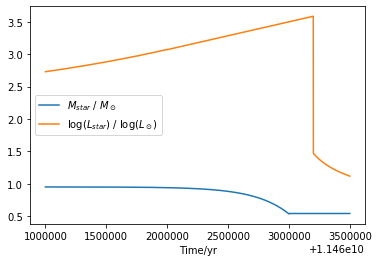

In [4]:
######################
# Get an array of times over which to do the analysis. User can define:
# - Nout:  number of measurements of the simulation
# - T0:    starting age of the star
# - t_tot: total time of integration for the system (M_star and L_star will start from T0) 
#
# This cell also plots those masses and luminosities.
######################

N_times = 10000
T0 = 1.14610e10
t_tot = 2500000

ts = np.linspace(0, t_tot, N_times)
mtimes = masses(ts + T0)
lumins = lums_array(ts + T0)

plt.plot(ts + T0, mtimes)
plt.plot(ts + T0, lumins)
plt.legend([r"$M_{star}$ / $M_\odot$", r"log($L_{star}$) / log($L_\odot$)"])
plt.xlabel("Time/yr")
plt.show()

# Moon sim

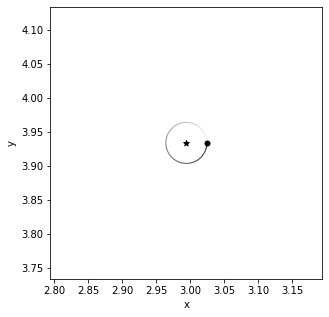

In [15]:
sim = rebound.Simulation()

num_hillies = 1

M0 = mtimes[0]

# Add Jupiter and satellites

sim.add(m=9.543e-4, x=0, y=0, z=0, vx=0, vy=0, vz=0, hash='jupiter')
add_moons(sim, num_hillies)
sim.add(m=M0, primary=sim.particles['jupiter'], a=5.2, e=.04839, inc=.022689, Omega=-np.sqrt(2)*np.pi/2, hash='Sun')
#set simulation parameters

sim.dt = 0.05
sim.integrator = 'whfast'
sim.move_to_com()

ps = sim.particles
fig, ax = rebound.OrbitPlot(sim)

x_j = ps['jupiter'].x
y_j = ps['jupiter'].y
ax.set_xlim(x_j-0.2,x_j+0.2)
ax.set_ylim(y_j-0.2,y_j+0.2)
fig.show()

In [16]:
num = num_hillies

rad_ast = 10                                        # radius in km
moon_radii = np.full(num, rad_ast/1.496e+8)      # gives each asteroid a radius in AU

mass_typic = 3*(4/3)*np.pi*(rad_ast*100000)**3      # gives typical mass @ this radius, w/ density = 3 g cm^-3
moon_masses = np.random.normal(mass_typic, .3*mass_typic, num)        
                                                    # gives array of values around that mass
moon_masses /= 1.9891e33                            # divides each mass by M_sol to get masses in M_sol

print("Typical moon mass:", mass_typic, "g")
print("Average moon mass:", np.mean(moon_masses), "M_sol")

Typical moon mass: 1.2566370614359173e+19 g
Average moon mass: 2.298815361962641e-15 M_sol


In [17]:
rebx = reboundx.Extras(sim)

starmass = reboundx.Interpolator(rebx, ts, mtimes, 'spline')
starlum = reboundx.Interpolator(rebx, ts, lumins, 'spline')

rebx = reboundx.Extras(sim)
yrkv = rebx.create_force("yarkovsky")

yrkv.force_type = "vel"
yrkv.update_accelerations = yark
rebx.add_force(yrkv)

gh = rebx.load_force("gravitational_harmonics")
rebx.add_force(gh)

mof = rebx.load_force("modify_orbits_forces")
rebx.add_force(mof)

J2 = 14736e-6
J2prime = 0.045020
R_jup = 0.000477895

ps['jupiter'].params["J2"] = J2prime
ps['jupiter'].params["R_eq"] = R_jup

In [18]:
Nout = 100000
times = np.linspace(0,t_tot,Nout)

In [19]:
# initialize arrays for tracking progression of bodies over integration

x_sol = np.zeros(Nout); y_sol = np.zeros(Nout)
x_sol[0] = ps['Sun'].x
y_sol[0] = ps['Sun'].y

x_jup = np.zeros(Nout); y_jup = np.zeros(Nout)
x_jup[0] = ps['jupiter'].x
y_jup[0] = ps['jupiter'].y

mass = np.zeros(Nout)
a_jup = np.zeros(Nout)
e_jup = np.zeros(Nout) 
i_jup = np.zeros(Nout)
pmjup = np.zeros(Nout)
lmjup = np.zeros(Nout)

mass[0] = M0
a_jup[0] = ps['Sun'].a
e_jup[0] = ps['Sun'].e
i_jup[0] = ps['Sun'].inc
pmjup[0] = ps['Sun'].pomega
lmjup[0] = ps['Sun'].l

a_vals = np.zeros((num, Nout))
e_vals = np.zeros((num, Nout))
i_vals = np.zeros((num, Nout))
pmvals = np.zeros((num, Nout))
lmvals = np.zeros((num, Nout))
x_vals = np.zeros((num, Nout))
y_vals = np.zeros((num, Nout))

for moon in range(num):
    a_vals[moon,0] = ps[moon + 1].a
    e_vals[moon,0] = ps[moon + 1].e
    i_vals[moon,0] = ps[moon + 1].inc
    pmvals[moon,0] = ps[moon + 1].pomega
    lmvals[moon,0] = ps[moon + 1].l
    x_vals[moon,0] = ps[moon + 1].x
    y_vals[moon,0] = ps[moon + 1].y

In [20]:
%%time 

for i, time in enumerate(times):
    sim.integrate(time)
    
    ps['Sun'].m = starmass.interpolate(rebx, t=sim.t)
    sim.move_to_com()
    
    mass[i] = ps['Sun'].m
    x_sol[i] = ps['Sun'].x
    y_sol[i] = ps['Sun'].y
    x_jup[i] = ps['jupiter'].x
    y_jup[i] = ps['jupiter'].y  
    a_jup[i] = ps['Sun'].a
    e_jup[i] = ps['Sun'].e
    i_jup[i] = ps['Sun'].inc
    pmjup[i] = ps['Sun'].pomega
    lmjup[i] = ps['Sun'].l
    
    for moon in range(num):
        
        a_vals[moon, i] = ps[moon + 1].a
        e_vals[moon, i] = ps[moon + 1].e
        i_vals[moon, i] = ps[moon + 1].inc
        pmvals[moon, i] = ps[moon + 1].pomega
        lmvals[moon, i] = ps[moon + 1].l
        x_vals[moon, i] = ps[moon + 1].x
        y_vals[moon, i] = ps[moon + 1].y

CPU times: user 1h 34min 54s, sys: 1min 15s, total: 1h 36min 10s
Wall time: 1h 41min 40s


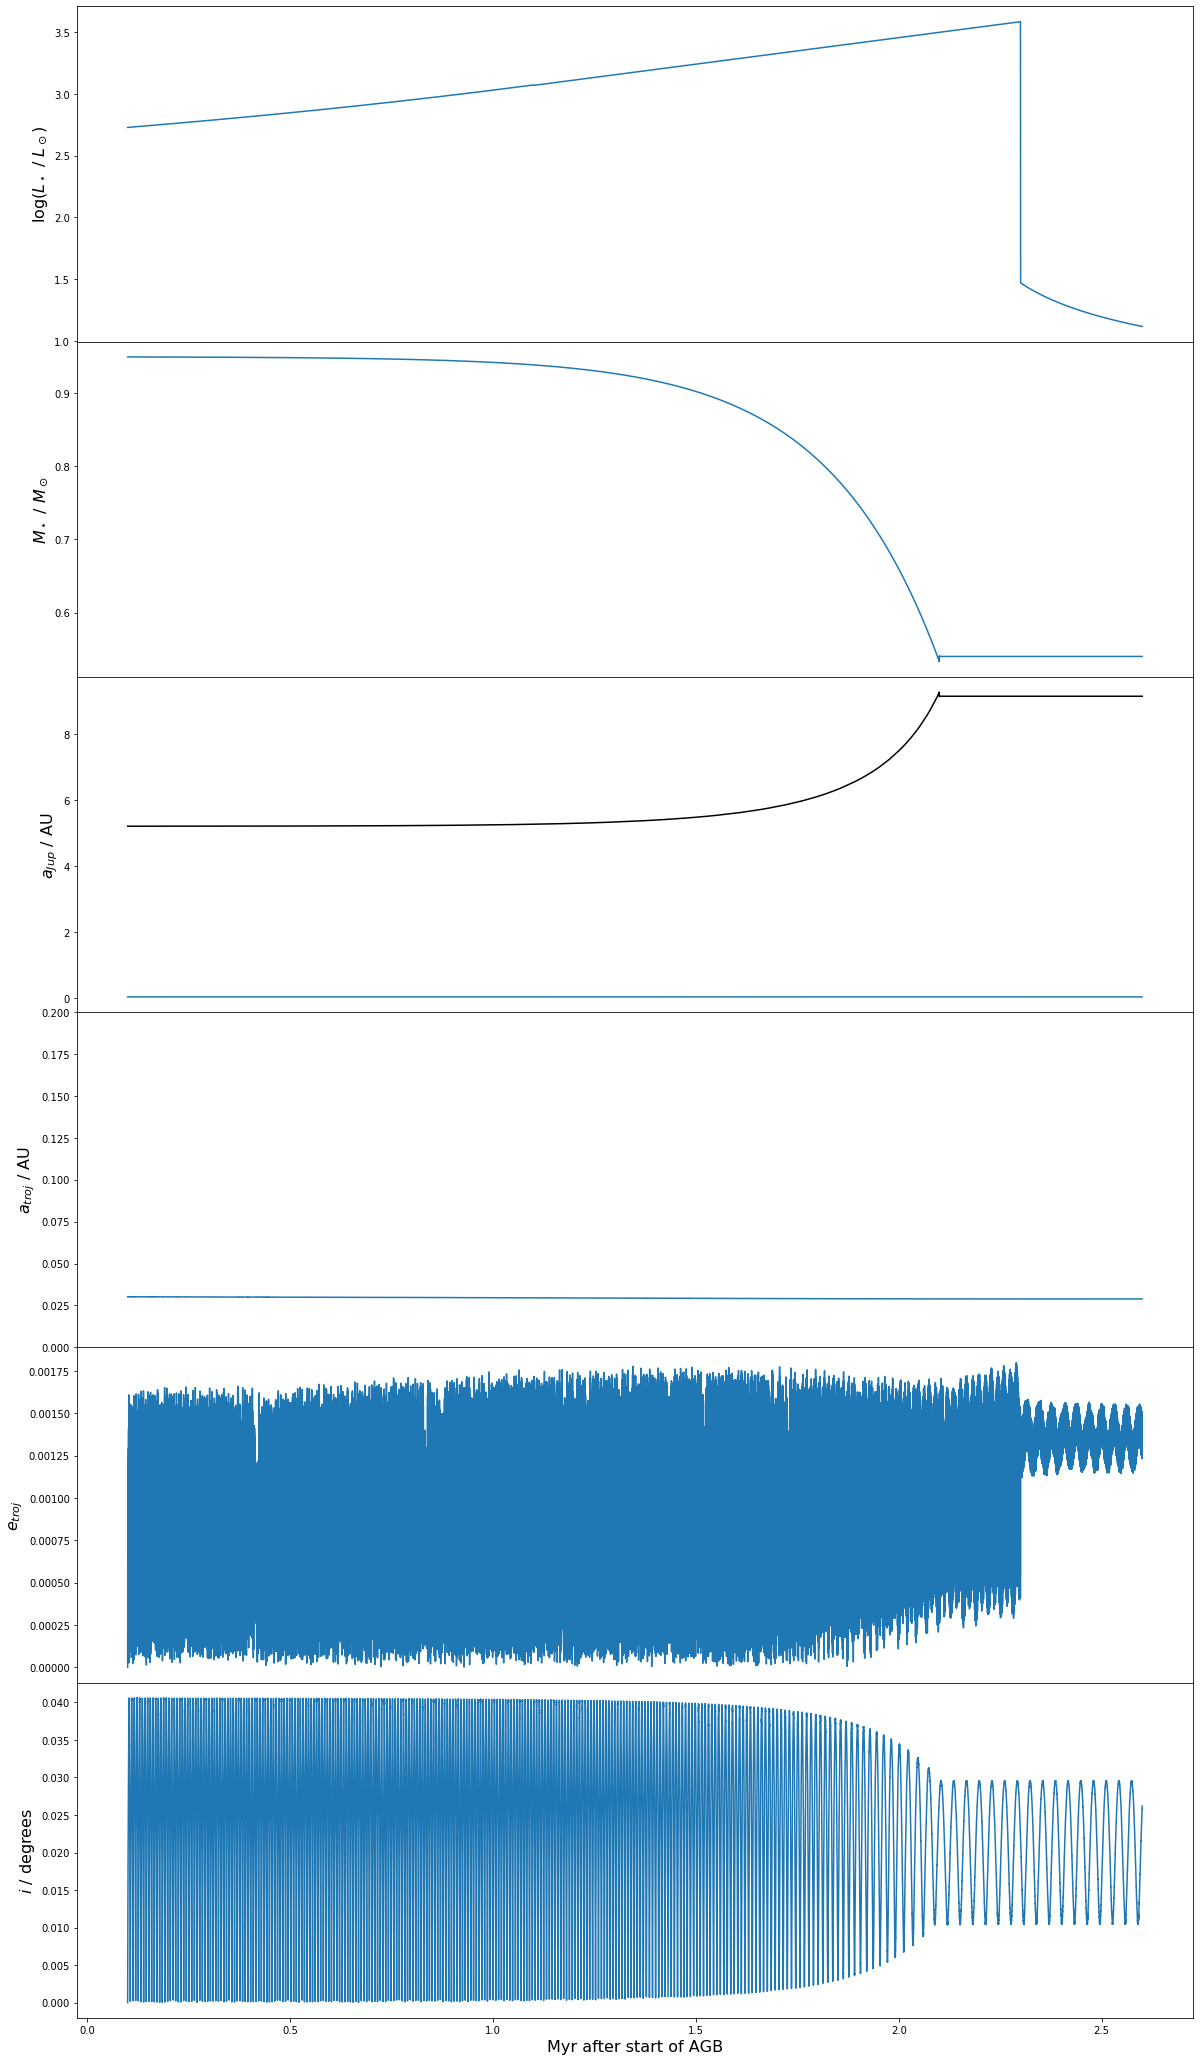

In [21]:
fig, ax = plt.subplots(6,1,figsize=(20,37), sharex=True)
plt.subplots_adjust(hspace=0)

end = Nout

ax[0].plot(ts[:end]/1e6+.1,lumins[:end])
ax[0].set_ylabel(r"log($L_\star$ / $L_\odot$)", fontsize=16)
ax[1].plot(times[:end]/1e6+.1,mass[:end])
ax[1].set_ylabel(r"$M_\star$ / $M_\odot$", fontsize=16)
ax[2].plot(times[:end]/1e6+.1, a_vals.T[:end,:])
ax[2].plot(times[:end]/1e6+.1, a_jup[:end], "k")
ax[2].set_ylabel(r"$a_{Jup}$ / AU", fontsize=16)
ax[3].plot(times[:end]/1e6+.1, a_vals.T[:end, :])
ax[3].plot(times[:end]/1e6+.1, a_jup[:end], "k")
ax[3].set_ylim(0,.2)
ax[3].set_ylabel(r"$a_{troj}$ / AU", fontsize=16)
ax[4].plot(times[:end]/1e6+.1, e_vals.T[:end,:])
ax[4].set_ylabel(r"$e_{troj}$", fontsize=16)
ax[5].plot(times[:end]/1e6+.1, i_vals.T[:end,:])
ax[5].set_ylabel(r"$i$ / degrees", fontsize=16)
ax[5].set_xlabel("Myr after start of AGB", fontsize=16)

fig.show()
#fig.savefig("irregs-all-elements.png", dpi=300)

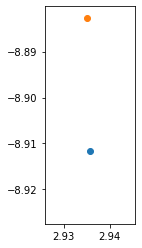

In [22]:
fig, ax = plt.subplots()
ax.scatter(x_vals[:,end-1],y_vals[:,end-1])
ax.scatter(x_jup[end-1],y_jup[end-1])
ax.set_aspect("equal")
fig.show()

NameError: name 'Omvals' is not defined

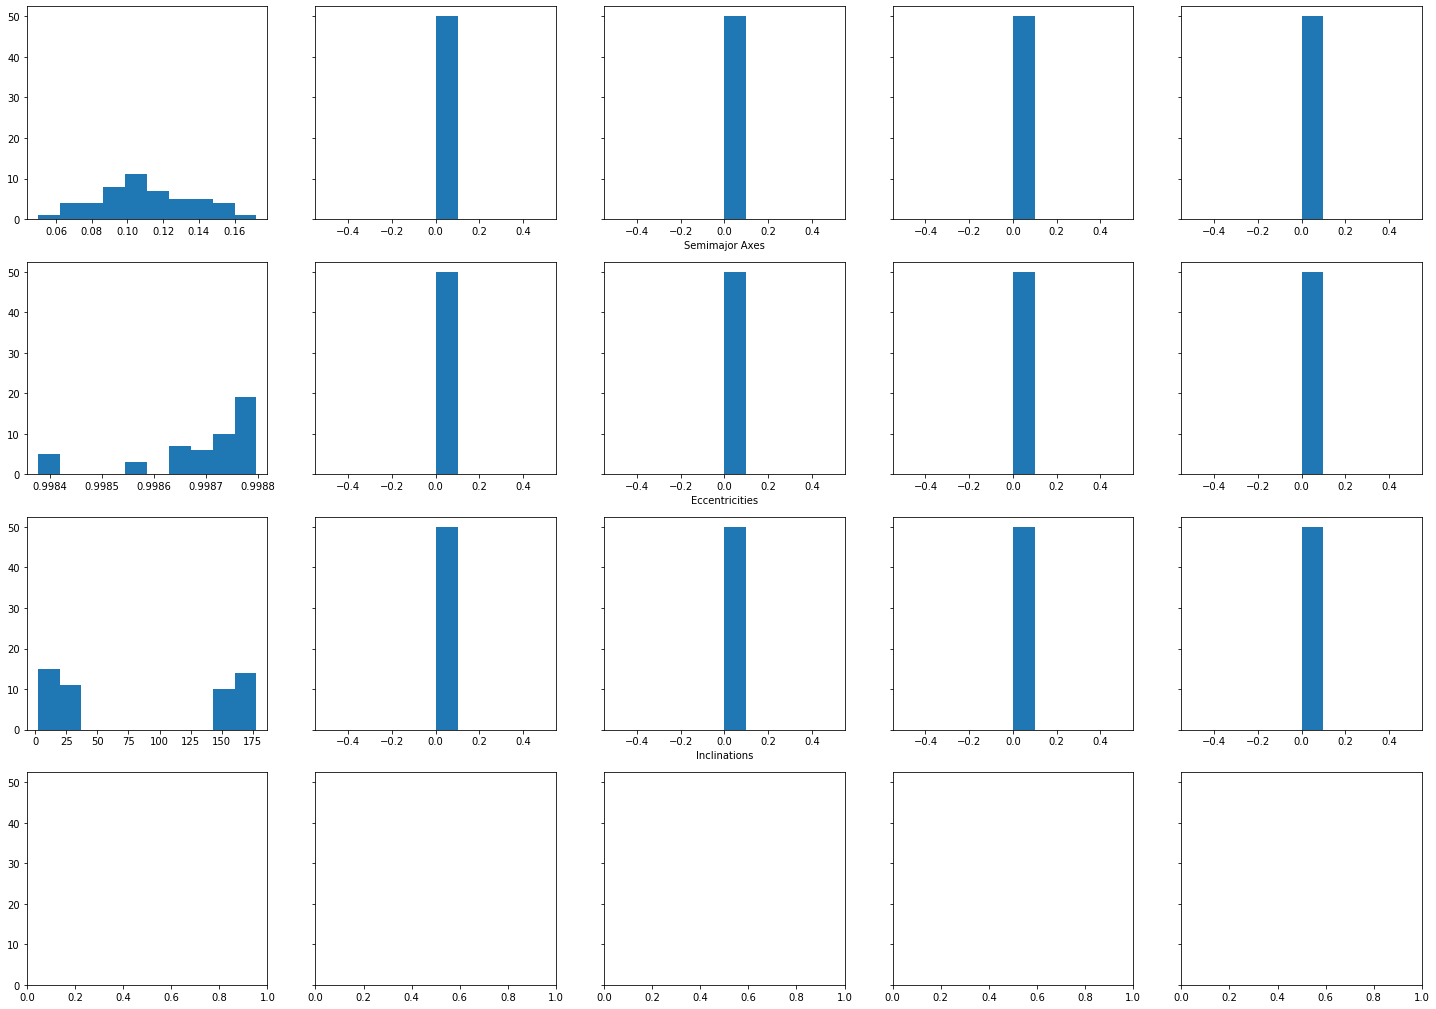

In [62]:
hists, hax = plt.subplots(4,5,figsize=(25,18), sharey=True)

(t1, t2, t3, t4) = (int(Nout/4 - 1), int(Nout/2 - 1), int(3*Nout/4 - 1), int(Nout - 1))

hax[0,0].hist(a_vals[:,0], 10)
hax[0,1].hist(a_vals[:,t1], 10)
hax[0,2].hist(a_vals[:,t2], 10)
hax[0,3].hist(a_vals[:,t3], 10)
hax[0,4].hist(a_vals[:,t4], 10)
hax[0,2].set_xlabel("Semimajor Axes")

hax[1,0].hist(e_vals[:,0], 10)
hax[1,1].hist(e_vals[:,t1], 10)
hax[1,2].hist(e_vals[:,t2], 10)
hax[1,3].hist(e_vals[:,t3], 10)
hax[1,4].hist(e_vals[:,t4], 10)
hax[1,2].set_xlabel("Eccentricities")

hax[2,0].hist(i_vals[:,0], 10)
hax[2,1].hist(i_vals[:,t1], 10)
hax[2,2].hist(i_vals[:,t2], 10)
hax[2,3].hist(i_vals[:,t3], 10)
hax[2,4].hist(i_vals[:,t4], 10)
hax[2,2].set_xlabel("Inclinations")

hax[3,0].hist(Omvals[:,0], 10)
hax[3,1].hist(Omvals[:,t1], 10)
hax[3,2].hist(Omvals[:,t2], 10)
hax[3,3].hist(Omvals[:,t3], 10)
hax[3,4].hist(Omvals[:,t4], 10)
hax[3,2].set_xlabel("Omegas")

hists.tight_layout()

In [95]:
n = num_hillies
y = 85000
diffx = np.zeros((n,y))
diffy = np.zeros((n,y))

for i in range(n):
    diffx[i,:] = signal.medfilt(x_jup[:y] - x_vals[i,:y],499)
    diffy[i,:] = signal.medfilt(y_jup[:y] - y_vals[i,:y],499)
    
    if ((n/(i+1)) == 2):
        print("Wooooooooooah we're halfway there")

Wooooooooooah we're halfway there


In [114]:
r_raw4 = np.sqrt(np.power(diffx,2) + np.power(diffy,2))
r_4 = np.mean(r_raw4,0)

[5.37148425e-01 1.06013915e+01 2.66012780e+01 9.15834811e+00
 5.36440981e+00 2.73911485e+01 3.70518508e+01 3.24390905e-02
 2.14524084e+01 5.81553519e-02]


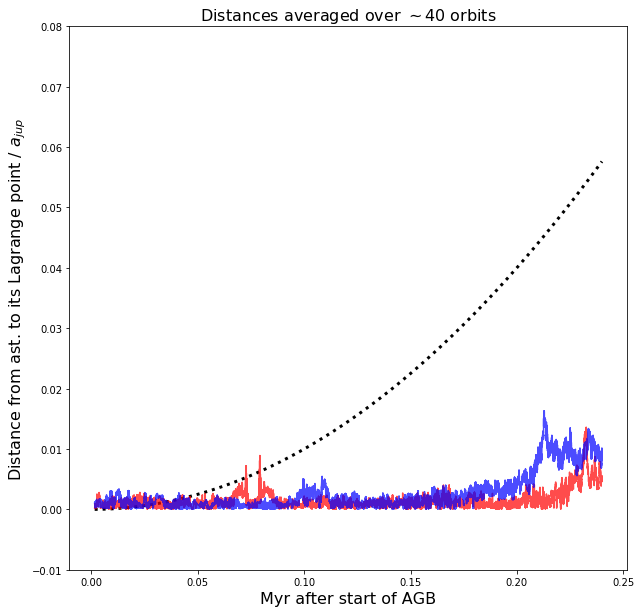

In [120]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(times[500:y-5000]/1e6,(r_4[500:y-5000])/a_jup[500:y-5000],'r',lw=3)
ax.plot(times[500:y-5000]/1e6,np.power(times[500:y-5000]/1e6,2),'k',ls=":",lw=3)
ax.plot(times[500:y-5000]/1e6,(r_raw4.T[500:y-5000,7]/a_jup[500:y-5000]).T, c='r', alpha=.7)
ax.plot(times[500:y-5000]/1e6,(r_raw4.T[500:y-5000,9]/a_jup[500:y-5000]).T, c='b', alpha=.7)
ax.set_xlabel("Myr after start of AGB", fontsize=16)
ax.set_ylabel(r"Distance from ast. to its Lagrange point / $a_{jup}$", fontsize=16)
ax.set_ylim(-0.01,0.08)
ax.set_title(r"Distances averaged over $\sim$40 orbits", fontsize=16)
fig.show()
fig.savefig("hill-jup-dists-w-inds-w-walk.png", dpi=300)

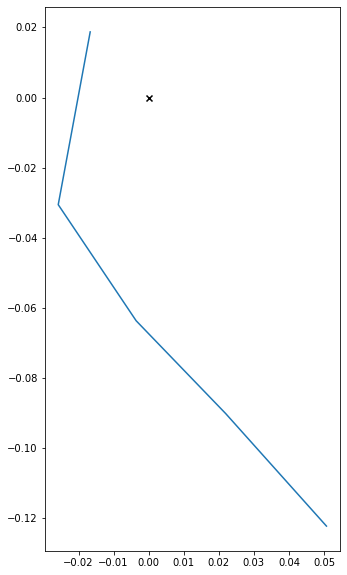

In [134]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot((x_vals[0,:5]-x_jup[:5])/a_jup[:5],(y_vals[0,:5]-y_jup[:5])/a_jup[:5])
ax.scatter(0,0,marker="x",c="k")
ax.set_aspect("equal")

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))


ax.plot((x_vals[0,:5]-x_jup[:5])/a_jup[:5],(y_vals[0,:5]-y_jup[:5])/a_jup[:5])
ax.scatter(0,0,marker="x",c="k")
ax.set_aspect("equal")